# Exercice : convolution pour le calcul d'une densité - Solution

## Solution

In [1]:
import openturns as ot

On utilise d'abord la méthode fondée sur l'arithmétique des distributions.

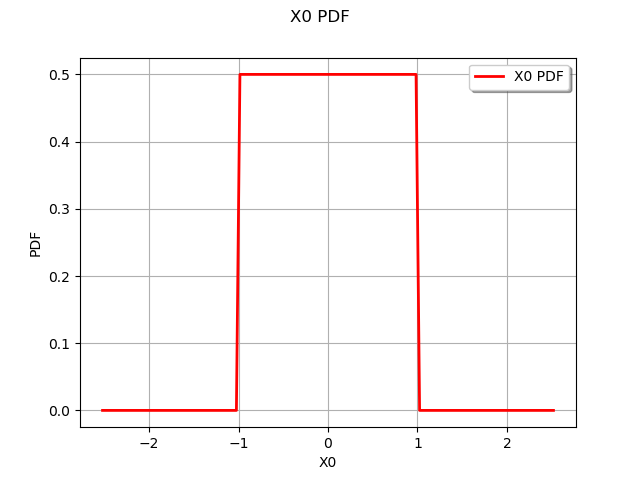

In [2]:
X = ot.Uniform(-1.,1.)
X.drawPDF()

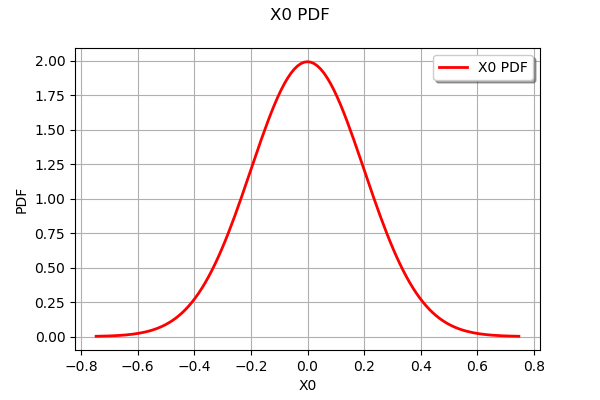

In [3]:
Y = ot.Normal(0.,0.2)
Y.drawPDF()

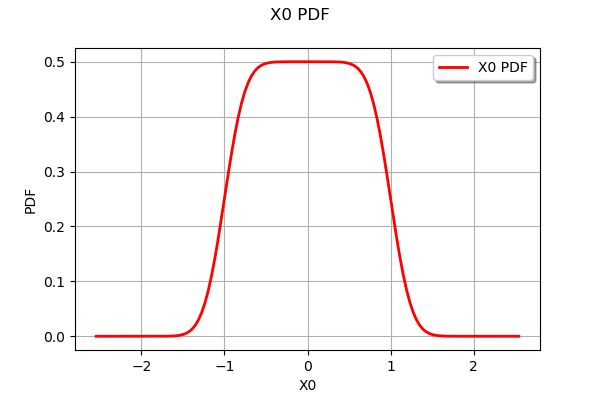

In [4]:
Z = X + Y
Z.drawPDF()

In [5]:
z = 1.2
d1 = Z.computePDF(z)
d1

0.07932762696572854

On utilise ensuite la méthode fondée sur le produit de convolution.

In [6]:
def gbase(y):
    c = X.computePDF(z-y[0]) * Y.computePDF(y[0])
    return [c]
g = ot.PythonFunction(1,1,gbase)

In [7]:
# Check
y = ot.Point([1.])
print(gbase(y))
print(g(y))

[3.7167987868357464e-06]
[3.7168e-06]


In [8]:
gkr = ot.GaussKronrodRule(ot.GaussKronrodRule.G11K23)
algo = ot.GaussKronrod(100, 1e-8, gkr)
bounds = ot.Interval(-2., 2.)
d2 = algo.integrate(g, bounds)[0]
d2

0.07932762684016315

Pour comparer les deux résultats on évalue l'erreur relative, que l'on convertit en nombre de chiffres communs.

In [9]:
import numpy as np
re = abs(d1-d2)/abs(d1)
print(re)
cd = -np.log10(re)
print(cd)

1.5828708890042058e-09
8.800554508056027


On observe que les deux calculs possèdent 8 chiffres communs. Ce résultat est cohérent avec l'erreur absolue que nous avons utilisée dans la règle de Gauss-Kronrod.